# Graph Clustering

In [81]:
import networkx as nx

def find_clusters(adj_matrix):
    # Convert adjacency matrix to list
    edges = []
    num_nodes = len(adj_matrix)
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if adj_matrix[i][j] == 1:
                edges.append((i, j))

    # Create a graph from the list
    G = nx.Graph(edges)

    # Find all maximal cliques
    cliques = list(nx.find_cliques(G))

    # Initialize clusters as a list of sets
    clusters = [set(clique) for clique in cliques]

    # Remove overlapping nodes from clusters
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            if clusters[i].intersection(clusters[j]):
                clusters[j] -= clusters[i]

    # Remove empty clusters
    clusters = [cluster for cluster in clusters if cluster]

    return clusters


# Plot Graph

In [82]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def plot_graph(adj_matrix):
    G = nx.from_numpy_array(np.array(adj_matrix))
    nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=300)
    plt.show()

# Example 1

Cluster 1:
{0, 1, 2}

Cluster 2:
{3}

Cluster 3:
{4}



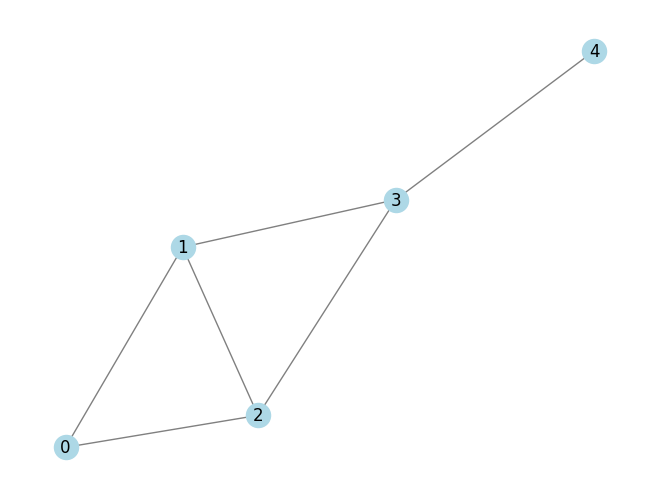

In [83]:
adj_matrix = [
    [0, 1, 1, 0, 0],
    [1, 0, 1, 1, 0],
    [1, 1, 0, 1, 0],
    [0, 1, 1, 0, 1],
    [0, 0, 0, 1, 0]
]

final_clustering = find_clusters(adj_matrix)

for i, cluster in enumerate(final_clustering):
    print(f"Cluster {i + 1}:")
    print(cluster)
    print()
plot_graph(adj_matrix)

# Example 2

Cluster 1:
{0, 1, 2, 3}

Cluster 2:
{4}



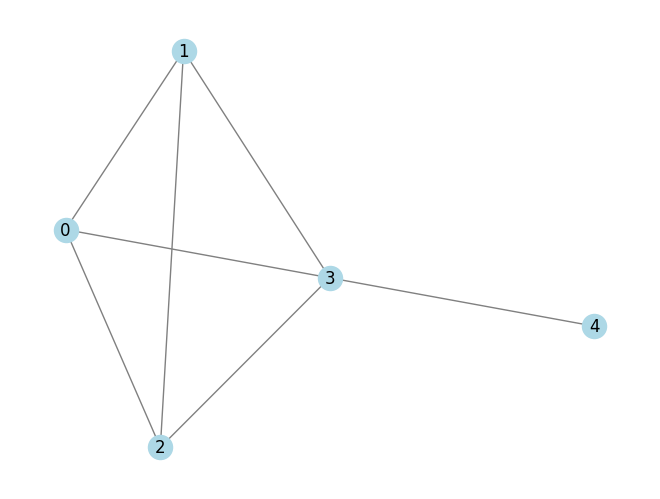

In [84]:
adj_matrix1 = [
    [0, 1, 1, 1, 0],
    [1, 0, 1, 1, 0],
    [1, 1, 0, 1, 0],
    [1, 1, 1, 0, 1],
    [0, 0, 0, 1, 0]
]

final_clustering = find_clusters(adj_matrix1)

for i, cluster in enumerate(final_clustering):
    print(f"Cluster {i + 1}:")
    print(cluster)
    print()
plot_graph(adj_matrix1)

# Example 3

Cluster 1:
{0, 1, 5, 14, 17}

Cluster 2:
{4}

Cluster 3:
{8}

Cluster 4:
{18, 11}

Cluster 5:
{15}

Cluster 6:
{16}

Cluster 7:
{3}

Cluster 8:
{7}

Cluster 9:
{2}

Cluster 10:
{9, 13}

Cluster 11:
{12}

Cluster 12:
{10}

Cluster 13:
{6}

Cluster 14:
{19}



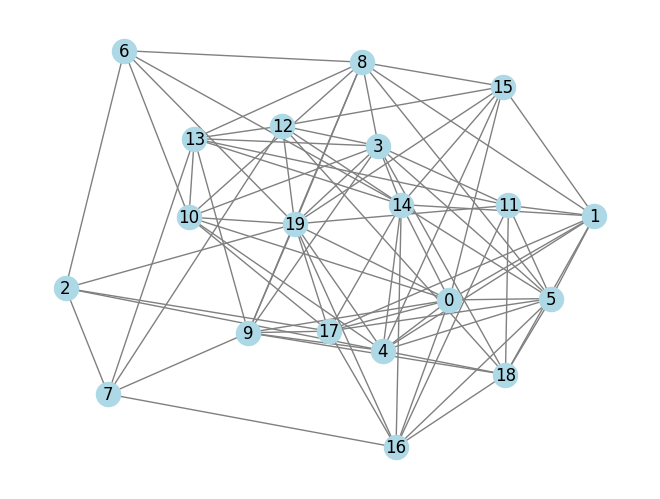

In [85]:
import random

num_nodes = 20
adj_matrix = [[0] * num_nodes for _ in range(num_nodes)]

for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        # Generate a random edge between nodes i and j
        edge = random.randint(0, 1)
        
        # Check if adding this edge creates a cycle
        if edge == 1 and (adj_matrix[i][j] == 1 or adj_matrix[j][i] == 1):
            edge = 0
        
        adj_matrix[i][j] = edge
        adj_matrix[j][i] = edge


final_clustering = find_clusters(adj_matrix)

for i, cluster in enumerate(final_clustering):
    print(f"Cluster {i + 1}:")
    print(cluster)
    print()
plot_graph(adj_matrix)